In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from scipy.signal import convolve2d
import matplotlib.pyplot as plt


In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
y_train = y_train.flatten()
y_test = y_test.flatten()


In [4]:
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)



Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


In [5]:
class_names = ['airplane','automobile','bird','cat','deer',
         'dog','frog','horse','ship','truck']



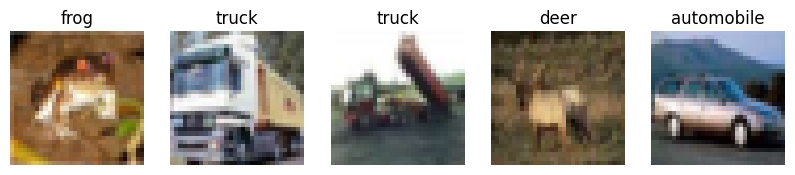

In [6]:
plt.figure(figsize=(10,2))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(X_train[i])
  plt.title(class_names[y_train[i]])
  plt.axis('off')
plt.show()


In [7]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [8]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [9]:
X_train, X_val, y_train_cat, y_val_cat = train_test_split(
  X_train, y_train_cat, test_size=0.1, random_state=42)


In [10]:
print("After split:")
print("Train:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)


After split:
Train: (45000, 32, 32, 3)
Validation: (5000, 32, 32, 3)
Test: (10000, 32, 32, 3)


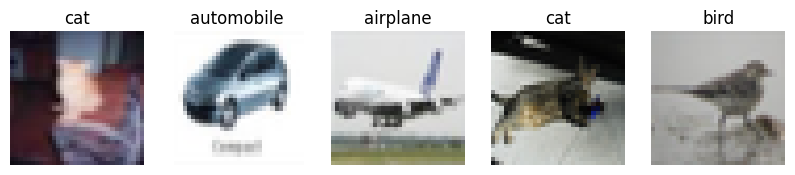

In [11]:
plt.figure(figsize=(10,2))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(X_train[i])
  plt.title(class_names[np.argmax(y_train_cat[i])])
  plt.axis('off')
plt.show()


In [12]:
model = models.Sequential([
  layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(64, (3,3), activation='relu', padding='same'),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(128, (3,3), activation='relu', padding='same'),
  layers.MaxPooling2D((2,2)),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.4),
  layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 620,362 (2.37 MB)

 Trainable params: 620,362 (2.37 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:

vertical_filter = np.array([[1, 0, -1],
              [1, 0, -1],
              [1, 0, -1]])
horizontal_filter = np.array([[1, 1, 1],
                [0, 0, 0],
                [-1, -1, -1]])


In [17]:
sample_image = X_train[0]
sample_gray = np.mean(sample_image, axis=2)
vertical_edges = convolve2d(sample_gray, vertical_filter, mode='same', boundary='fill', fillvalue=0)
horizontal_edges = convolve2d(sample_gray, horizontal_filter, mode='same', boundary='fill', fillvalue=0)



(np.float64(-0.5), np.float64(31.5), np.float64(31.5), np.float64(-0.5))

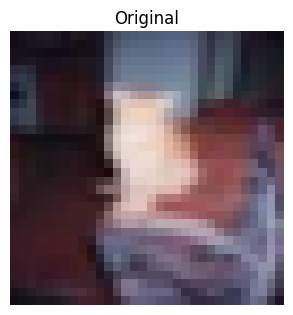

In [18]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(sample_image)
plt.title("Original")
plt.axis('off')


(np.float64(-0.5), np.float64(31.5), np.float64(31.5), np.float64(-0.5))

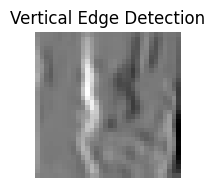

In [19]:
plt.subplot(1,3,2)
plt.imshow(vertical_edges, cmap='gray')
plt.title("Vertical Edge Detection")
plt.axis('off')


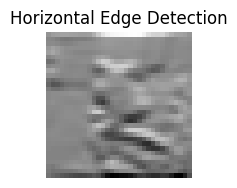

In [20]:
plt.subplot(1,3,3)
plt.imshow(horizontal_edges, cmap='gray')
plt.title("Horizontal Edge Detection")
plt.axis('off')
plt.show()


In [21]:
model.compile(optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'])


In [25]:
history = model.fit(X_train, y_train_cat,
          epochs=4,
          batch_size=64,
          validation_data=(X_val, y_val_cat))


Epoch 1/4
704/704 ━━━━━━━━━━━━━━━━━━━━ 101s 142ms/step - accuracy: 0.5633 - loss: 1.2320 - val_accuracy: 0.6112 - val_loss: 1.1075
Epoch 2/4
704/704 ━━━━━━━━━━━━━━━━━━━━ 134s 131ms/step - accuracy: 0.6490 - loss: 0.9887 - val_accuracy: 0.6536 - val_loss: 0.9670
Epoch 3/4
704/704 ━━━━━━━━━━━━━━━━━━━━ 92s 131ms/step - accuracy: 0.6953 - loss: 0.8688 - val_accuracy: 0.7074 - val_loss: 0.8130
Epoch 4/4
704/704 ━━━━━━━━━━━━━━━━━━━━ 142s 130ms/step - accuracy: 0.7262 - loss: 0.7719 - val_accuracy: 0.7226 - val_loss: 0.7813


Text(0.5, 1.0, 'Accuracy')

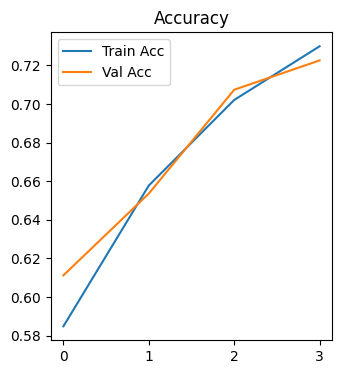

In [26]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')


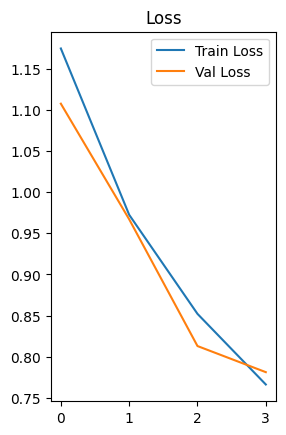

In [27]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()


In [28]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {test_acc*100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.7187 - loss: 0.8170
Test Accuracy: 71.75%


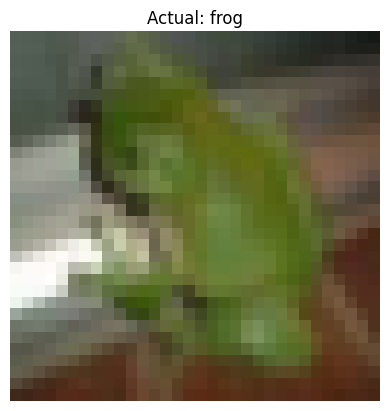

In [29]:
i = 7
plt.imshow(X_test[i])
plt.title("Actual: " + class_names[y_test[i]])
plt.axis('off')
plt.show()


In [30]:
pred = model.predict(X_test[i].reshape(1,32,32,3))
print("Predicted Category:", class_names[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Predicted Category: frog
